In [ ]:
import pandas as pd

### Reading data from the dataset

In [ ]:
f = open("/content/drive/My Drive/Imagecaption dataset/Flickr8k.token.txt", "r")

In [ ]:
doc=f.read()

In [ ]:
doc=doc.split("\n")[:-1]

In [ ]:
len(doc)

40460

In [ ]:
doc

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

Preprocessing the captions



In [ ]:
img={}
for line in doc:
  first,second=line.split('\t')
  img_name=first.split(".")[0]
  if img.get(img_name) is None:
        img[img_name] = []
    
  img[img_name].append(second)

In [ ]:
img["1207159468_425b902bfb"]

['A boy and a person suspended above a dome structure .',
 'A boy in a blue shirt is posing in front of an igloo type building with a person dangling from a rope above the building .',
 'A boy poses for a picture and in the background a man is hanging by a rope .',
 'A boy stands near a structure outside .',
 'a young man wearing a blue shirt with a strange white building in the background']

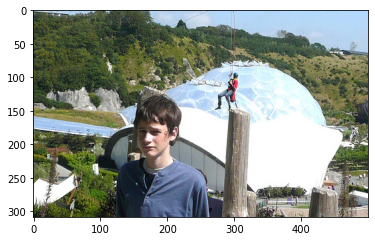

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image
load_img=image.imread("/content/drive/My Drive/Imagecaption dataset/Images/1207159468_425b902bfb"+".jpg")
plt.imshow(load_img)

In [ ]:
import re
import nltk

for key,desc in img.items():
  for i in range(len(desc)):
    desc[i]=desc[i].lower()
    desc[i]=re.sub("[^a-z]+"," ",desc[i])
    
    

In [ ]:
img["1207159468_425b902bfb"]

['a boy and a person suspended above a dome structure ',
 'a boy in a blue shirt is posing in front of an igloo type building with a person dangling from a rope above the building ',
 'a boy poses for a picture and in the background a man is hanging by a rope ',
 'a boy stands near a structure outside ',
 'a young man wearing a blue shirt with a strange white building in the background']

In [ ]:
len(img)

8092

Creating A Vocab Of All unique Words in the Dataset.


In [ ]:
vocab=set()
for key,desc in img.items():
  for i in desc:
    i=i.split()
    vocab.update(i)

In [ ]:
len(vocab)

8441

In [ ]:
all_train_caption={}
for key,desc in img.items():
    for i in desc:
      i=i.split()
      for word in i:
        if word in  all_train_caption:
          all_train_caption[word]+=1
        else:
          all_train_caption[word]=1

In [ ]:
vocab=[w for w in all_train_caption if all_train_caption[w] >= 10]

In [ ]:
len(vocab)

1961

<BarContainer object of 30 artists>

<Figure size 432x288 with 0 Axes>

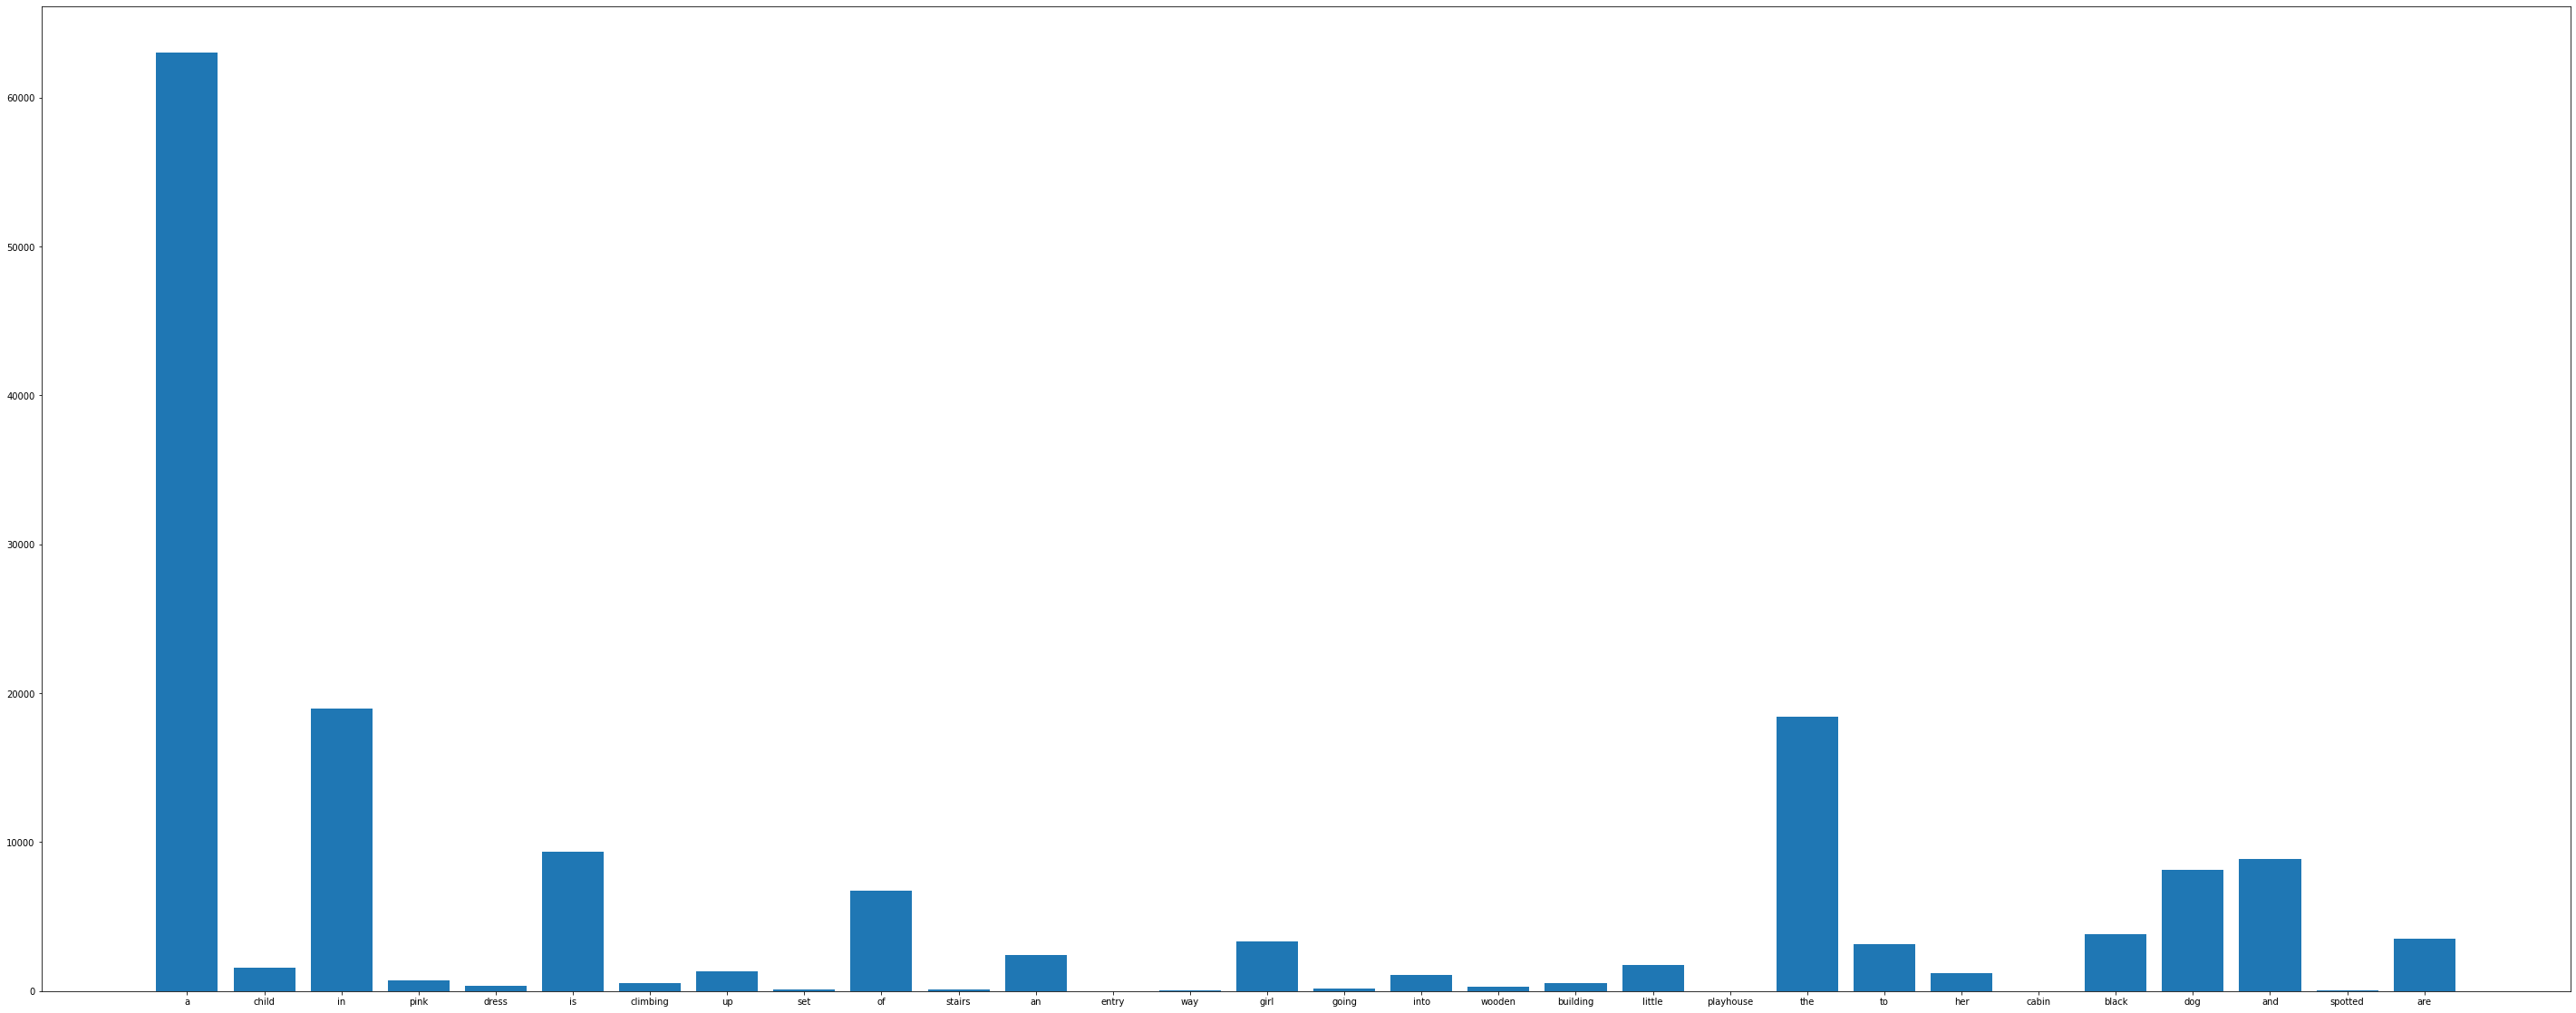

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

x=list(all_train_caption.keys())[0:30]
y=list(all_train_caption.values())[0:30]
plt.figure(figsize=(50,20))
plt.bar(x,y)

Creating A Dictionary for Training Set

In [ ]:
train_file = open('/content/drive/My Drive/Imagecaption dataset/Flickr_8k.trainImages.txt')

In [ ]:
train_set=train_file.read()

In [ ]:
train_set=train_set.split("\n")[:-1]

In [ ]:
train_img=[]

In [ ]:
count=0
for it in train_set:
  it=it.split(".")[0]
  train_img.append(it)


In [ ]:
len(train_img)

6000

In [ ]:
 train_dict=dict()

In [ ]:
def train_dict_create():
  for item in train_img:
    train_dict[item]=[]
    for cap in img[item]:
      caption="startseq "+ cap +" endseq"
      train_dict[item].append(caption)

In [ ]:
train_dict_create()

In [ ]:
train_dict[train_img[0]]

['startseq a black dog is running after a white dog in the snow  endseq',
 'startseq black dog chasing brown dog through snow endseq',
 'startseq two dogs chase each other across the snowy ground  endseq',
 'startseq two dogs play together in the snow  endseq',
 'startseq two dogs running through a low lying body of water  endseq']

ENCODING IMAGES INTO MATRICES USING RESNET-50





In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add
import numpy as np


In [ ]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
model_new = Model(model.input,model.layers[-2].output)


In [ ]:
def preprocess_img(imag):
    imag = image.load_img(imag,target_size=(224,224))
    imag = image.img_to_array(imag)
    imag = np.expand_dims(imag,axis=0)
    # Normalisation
    imag = preprocess_input(imag)
    return imag

In [ ]:
train_img[0]

'2513260012_03d33305cf'

In [ ]:
def encode_image(im):
  im=preprocess_img(im)
  feature_vector=model_new.predict(im)
  feature_vector=feature_vector.reshape((-1,))
  return feature_vector

In [ ]:
train_img_vector={}
for i,item in enumerate(train_img):
  path="/content/drive/My Drive/Imagecaption dataset/Images/"+item+".jpg"
  train_img_vector[item]=encode_image(path)
  if i%100==0:
    print("Encoding in progress in step %d "%i)

Encoding in progress in step 0 
Encoding in progress in step 100 
Encoding in progress in step 200 
Encoding in progress in step 300 
Encoding in progress in step 400 
Encoding in progress in step 500 
Encoding in progress in step 600 


KeyboardInterrupt: ignored

In [ ]:
train_img_vector[train_img[0]]

array([0.34707907, 0.5115918 , 0.08728851, ..., 1.1897289 , 0.04043859,
       0.1527107 ], dtype=float32)

In [ ]:
import pickle
with open("encoded_train2k_matrices.pkl","wb") as d:
  pickle.dump(train_img_vector,d)

In [ ]:
train_img_vector=pd.read_pickle("/content/drive/MyDrive/Imagecaption dataset/encoded_train_matrices.pkl")

In [ ]:
train_img_vector[train_img[0]]

array([0.34707952, 0.5115908 , 0.08728842, ..., 1.1897292 , 0.04043854,
       0.1527107 ], dtype=float32)

In [ ]:
test_file = open('/content/drive/My Drive/Imagecaption dataset/Flickr_8k.testImages.txt')

In [ ]:
test_set=test_file.read()

In [ ]:
test_set=test_set.split("\n")[:-1]

In [ ]:
test_img=[]
for it in test_set:
  it=it.split(".")[0]
  test_img.append(it)

In [ ]:
test_img[0]

'3385593926_d3e9c21170'

In [ ]:
test_img_vector={}
for i,item in enumerate(test_img):
  path="/content/drive/My Drive/Imagecaption dataset/Images/"+item+".jpg"
  test_img_vector[item]=encode_image(path)
  if i%100==0:
    print("Encoding in progress in step %d "%i)

Encoding in progress in step 0 
Encoding in progress in step 100 
Encoding in progress in step 200 
Encoding in progress in step 300 
Encoding in progress in step 400 
Encoding in progress in step 500 
Encoding in progress in step 600 
Encoding in progress in step 700 
Encoding in progress in step 800 
Encoding in progress in step 900 


In [ ]:
import pickle
with open("/content/drive/My Drive/Imagecaption dataset/encoded_test_matrices.pkl","wb") as d:
  pickle.dump(test_img_vector,d)

### Creating Word to Index and Index to word dictionary

In [ ]:
test_img_vector=pd.read_pickle("/content/drive/MyDrive/Imagecaption dataset/encoded_test_matrices.pkl")

In [ ]:
word_to_idx = {}
idx_to_word = {}

for i,word in enumerate(vocab):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word

In [ ]:
print(len(idx_to_word))

1961


In [ ]:
len(vocab)

1961

In [ ]:
word_to_idx["startseq"]=1962
idx_to_word[1962] ="startseq"
idx_to_word[1963] = "endseq"
word_to_idx["endseq"] = 1963

In [ ]:
vocab_size = len(word_to_idx) + 1
print("Vocab Size",vocab_size)

Vocab Size 1964


In [ ]:
max_len = 0 
for key in train_dict.keys():
    for cap in train_dict[key]:
        max_len = max(max_len,len(cap.split()))

print(max_len)

38


In [ ]:
import tensorflow as tf

## DATA GENERATOR ##

In [ ]:
def DataGenerator(train_descriptions,batch_size,encoding_train,word_to_idx):
    X1,X2,y=[],[],[]
    #x1- image features, x2=captions ,y = next word that should be predicted
    n =0
    while True:
        for key,desc_list in train_descriptions.items():
            n += 1
            photo = encoding_train[key]
            for desc in desc_list:
                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]
                for i in range(1,len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    #0 denote padding word
                    xi = pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi = keras.utils.to_categorical([yi],num_classes=vocab_size)[0]
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
            if n==batch_size:
                yield ([np.array(X1),np.array(X2)],np.array(y))
                X1,X2,y = [],[],[]
                n = 0


**WORD EMBEDDINGS**

In [ ]:
f=open("/content/drive/My Drive/Imagecaption dataset/glove.6B.50d.txt",encoding='utf8')

In [ ]:
embedding_index={}
for line in f:
  values=line.split()
  word=values[0]
  word_embedding = np.array(values[1:],dtype='float')
  embedding_index[word]=word_embedding

In [ ]:
f.close()

In [ ]:
embedding_index['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [ ]:
def retriving_matrix():
  emb_dim=50
  matrix=np.zeros((vocab_size,emb_dim))
  for word,idx in word_to_idx.items():
      embedding_vector = embedding_index.get(word)
      if embedding_vector is not None:
         matrix[idx] = embedding_vector
  return matrix

In [ ]:
len(vocab)

1961

In [ ]:
embedding_matrix=retriving_matrix()

In [ ]:
embedding_matrix[1960]

array([-8.2670e-01,  1.0863e+00, -3.9731e-01,  1.0596e+00,  2.0089e-01,
        1.0084e-01, -5.2578e-01,  4.2270e-01,  8.6226e-01, -7.1580e-01,
       -1.4840e-01,  5.2604e-01, -1.1111e+00, -4.8186e-01,  1.3625e+00,
        1.8245e-01,  1.1957e+00,  3.9381e-01, -1.6671e+00, -5.8542e-01,
        1.8579e-02, -4.9178e-01,  6.9967e-02, -5.2168e-01, -4.3009e-01,
       -1.0196e+00, -8.3223e-01,  7.4699e-02, -8.1249e-01, -4.7262e-01,
        5.9971e-01,  1.2628e+00, -6.3667e-04,  1.0833e-01,  5.4305e-01,
        9.3959e-01,  7.1336e-01,  1.1527e+00, -7.3393e-01, -1.4953e+00,
        9.3162e-02,  2.2725e-01, -5.5658e-01, -1.9165e-01, -1.2548e+00,
        6.2065e-01, -7.9834e-01, -3.4678e-01, -5.4817e-02, -9.0169e-01])

**MODEL**

In [ ]:
from keras.layers import LSTM,Dense,Activation,Dropout,RepeatVector,Embedding,TimeDistributed, Add, Input

In [ ]:
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)


In [ ]:
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [ ]:
decoder1 = add([inp_img2,inp_cap3])
decoder2 = Dense(256,activation='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

# Combined Model
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 38)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 38, 50)       98200       input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:

model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
encoding_train=pd.read_pickle("/content/drive/MyDrive/Imagecaption dataset/encoded_train_matrices.pkl")

In [ ]:
len(encoding_train)

6000

In [ ]:
epochs=20
batch_size=3
steps = len(train_dict)//batch_size

In [ ]:
import keras

### Training the model

In [ ]:
epochs = 20
number_pics_per_bath = 3
steps = len(train_dict)//number_pics_per_bath
for i in range(epochs):
    generator = DataGenerator(train_dict,number_pics_per_bath,encoding_train,word_to_idx)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

2000/2000 [==============================] - 31s 15ms/step - loss: 2.2626 - accuracy: 0.4376


In [ ]:
model.save_weights("/content/drive/MyDrive/Imagecaption dataset/weights_model.h5")

### Predicting the Captions for test images

In [ ]:
def predict_caption(photo):
    
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([photo,sequence])
        ypred = ypred.argmax() 
        word = idx_to_word[ypred]
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [ ]:
test_img_vector["3385593926_d3e9c21170"]

array([0.33316982, 0.38347775, 0.07253439, ..., 0.9083203 , 0.3560045 ,
       1.0914086 ], dtype=float32)

In [ ]:
encoding_test=pd.read_pickle("/content/drive/MyDrive/Imagecaption dataset/encoded_test_matrices.pkl")

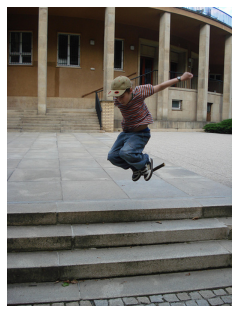

a man in a red shirt and a white helmet is barefoot on a street


In [ ]:
idx=np.random.randint(0,400)
pic = list(encoding_test.keys())[idx]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread('/content/drive/MyDrive/Imagecaption dataset/Images/'+pic+'.jpg')
plt.style.use('seaborn')
plt.axis('off')
plt.imshow(x)
plt.show()
print(predict_caption(image))

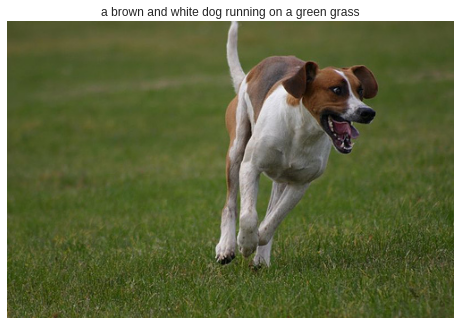

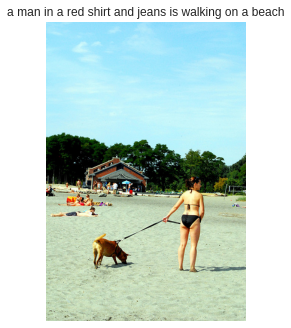

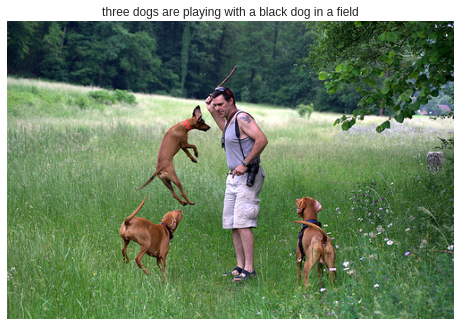

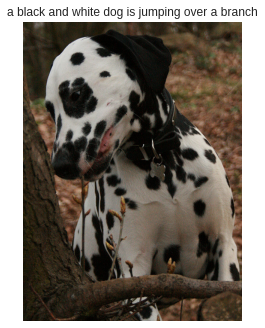

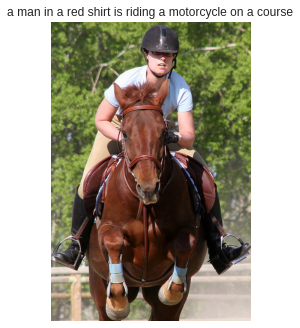

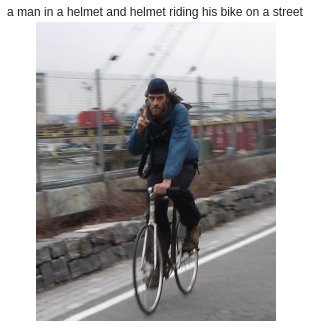

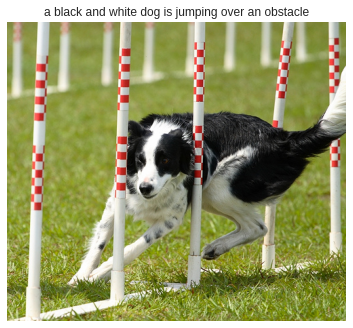

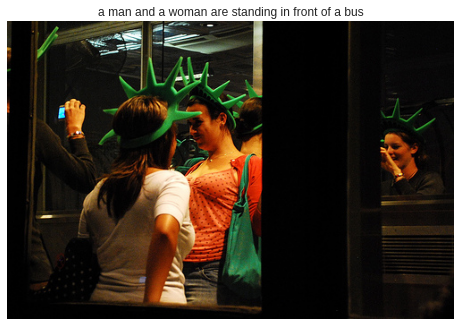

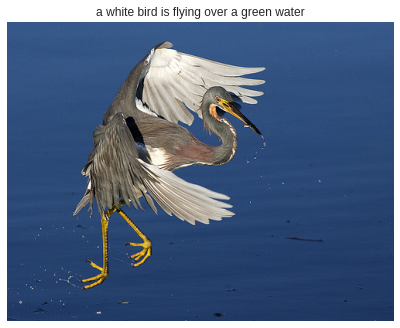

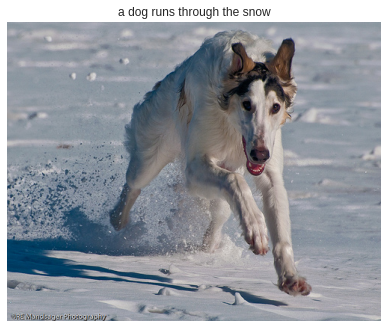

In [ ]:
plt.style.use("seaborn")
for i in range(10):
    idx = np.random.randint(0,1000)
    all_img_names = list(train_img_vector.keys())
    img_name = all_img_names[idx]
    photo_2048 = train_img_vector[img_name].reshape((1,2048))
    
    i = plt.imread("/content/drive/MyDrive/Imagecaption dataset/Images/"+img_name+".jpg")
    
    caption = predict_caption(photo_2048)
    #print(caption)
    
    plt.title(caption)
    plt.imshow(i)
    plt.axis("off")
    plt.show()

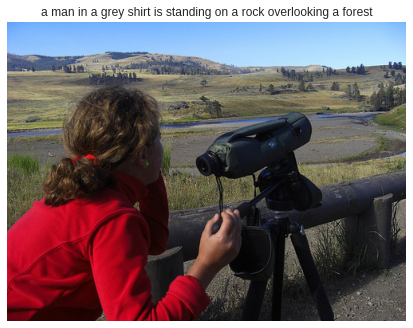

In [ ]:
idx = 10
all_img_names = list(train_img_vector.keys())
img_name = all_img_names[idx]
photo_2048 = train_img_vector[img_name].reshape((1,2048))
    
i = plt.imread("/content/drive/MyDrive/Imagecaption dataset/Images/"+img_name+".jpg")
    
caption = predict_caption(photo_2048)
    #print(caption)
    
plt.title(caption)
plt.imshow(i)
plt.axis("off")
plt.show()